In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from urllib.request import urlretrieve
# (TAB separated values 用tab隔開資料)
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
urlretrieve(url, "diabetes.tab.txt")
df = pd.read_csv("diabetes.tab.txt", encoding="utf-8", sep="\t")


In [2]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import load_diabetes

# diabetes = load_diabetes()
# df = pd.DataFrame(diabetes["data"], columns=diabetes["feature_names"])
# df["Y"] = diabetes["target"]
# df

<Axes: title={'center': 'Pearson Correlation of Features'}>

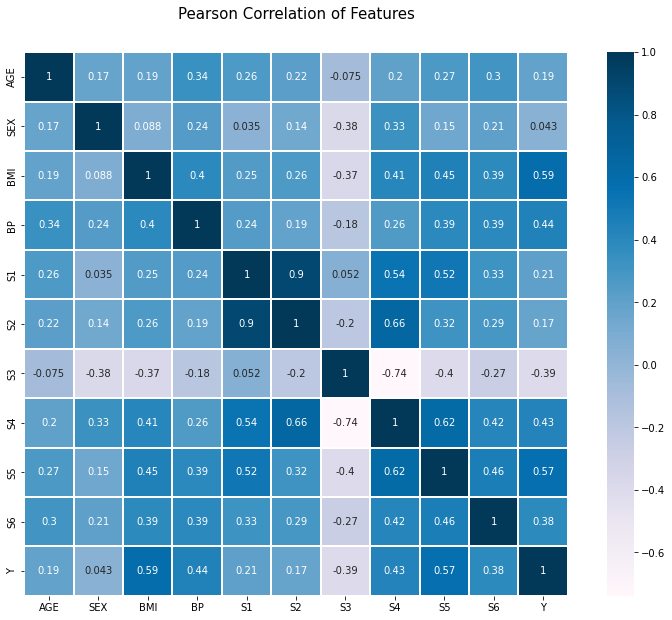

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  # 美化plot 
plt.figure(figsize=(14, 10))  # display_plot_size 
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1,cmap="PuBu", 
        square=True, linecolor="white", annot=True)
 # 觀察Pearson's correlation coefficient CHAS 0.18幅度最小 LSTAT-0.74幅度最大

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
diabetes_df = df.drop("Y", axis=1)
target_df = df["Y"]
diabetes_np = np.array(diabetes_df)
target_np = np.array(target_df)
# split 90% 10%
x_train, x_test, y_train, y_test = train_test_split(diabetes_np, target_np, test_size=0.1)

In [60]:
#做公式(fit)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(14,14))
# reg_tree, feature_names_title, filled_color_table
gz = export_graphviz(reg, feature_names=diabetes_df.columns, filled=True)
graphviz.Source(gz)

In [61]:
# 驗證
# prediction
predict = reg.predict(x_test)
print("預測結果:", predict)
print("實際結果", y_test)
interval = np.subtract(predict, y_test)
from sklearn.metrics import r2_score
# r2_score(y_ture, y_pred)
print("預測實際差異:", interval)
print("r2_score:", r2_score(y_test, predict))

預測結果: [108.2        153.5625     108.2        237.         242.05882353
  91.70491803 108.2        158.375      153.5625     108.2
 153.5625      66.47368421 108.2        230.45454545 230.45454545
 179.04761905 230.45454545 265.         179.04761905  91.70491803
 108.2        129.70833333 242.05882353 108.2        242.05882353
 108.2         91.70491803 265.         129.70833333 108.2
  91.70491803 108.2        153.5625      91.70491803 230.45454545
 108.2         91.70491803 108.2        129.70833333 230.45454545
 153.5625     153.5625     282.26666667  91.70491803 108.2       ]
實際結果 [ 71 220 160  91 252  59  92 197 242  79 276 108 155 268 164 237 272 206
 293 153 138 182 202 150 178  55 113 100 167  71  72  25 190  48 122 140
  65  53 140 242 197 292 336  65  89]
預測實際差異: [  37.2         -66.4375      -51.8         146.           -9.94117647
   32.70491803   16.2         -38.625       -88.4375       29.2
 -122.4375      -41.52631579  -46.8         -37.54545455   66.45454545
  -57.9523

In [8]:
pd.DataFrame(reg.feature_importances_ ,index=diabetes_df.columns ,columns=["Importances coefficient"])
# LSTAT,RM are important factor


,Importances coefficient
AGE,0.015980
SEX,0.007982
BMI,0.289197
BP,0.081565
S1,0.042225
S2,0.045897
S3,0.010808
S4,0.001406
S5,0.462034
S6,0.042905
